In [385]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, MinMaxScaler, OrdinalEncoder, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [285]:
columns = ['age', 'workclass', 'final_wght', 'education', 
           'education_num_years', 'marital_status', 'occupation', 
           'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 
           'hours_per_week', 'native_country', 'income']

df = pd.read_csv('./Data/adult.data', names=columns, sep=',', na_values=' ?')

In [286]:
display(df.head(), df.shape)

,age,workclass,final_wght,education,education_num_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


(32561, 15)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  32561 non-null  int64 
 1   workclass            30725 non-null  object
 2   final_wght           32561 non-null  int64 
 3   education            32561 non-null  object
 4   education_num_years  32561 non-null  int64 
 5   marital_status       32561 non-null  object
 6   occupation           30718 non-null  object
 7   relationship         32561 non-null  object
 8   race                 32561 non-null  object
 9   sex                  32561 non-null  object
 10  capital_gain         32561 non-null  int64 
 11  capital_loss         32561 non-null  int64 
 12  hours_per_week       32561 non-null  int64 
 13  native_country       31978 non-null  object
 14  income               32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [288]:
df.describe()

,age,final_wght,education_num_years,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<b>Observations:</b>
Age: Avg age is 38.5, min 17 and max 90

Capital gain has a high standard deviation, which means there are outliers

Capital loss has a high standard deviation, which means there are outliers

Hours per week: Avg hours per week is 40, min 1 and max 99

In [289]:
def show_value_counts():
    for col in df.columns:
        print(df[col].value_counts())
        print('-'*50)

In [290]:
show_value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: age, Length: 73, dtype: int64
--------------------------------------------------
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
--------------------------------------------------
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: final_wght, Length: 21648, dtype: int64
--------------------------------------------------
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th        

<b>Observations:</b>


### Duplicate removal

In [291]:
# total number of duplicate rows
dups = df.duplicated().sum()
print(dups)
print(dups.any())


24
True


In [292]:
print(df.shape)
df.drop_duplicates(inplace=True)
print(df.shape)

(32561, 15)
(32537, 15)


## Check for missing values

In [293]:
df.isna().sum()

age                       0
workclass              1836
final_wght                0
education                 0
education_num_years       0
marital_status            0
occupation             1843
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
hours_per_week            0
native_country          582
income                    0
dtype: int64

In [294]:
# trim leading and trailing spaces from categorical columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

In [295]:
df_missing = df[['workclass', 'occupation', 'native_country']]
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       30701 non-null  object
 1   occupation      30694 non-null  object
 2   native_country  31955 non-null  object
dtypes: object(3)
memory usage: 1016.8+ KB


<b>Observation:</b>
<br>
The colums with missing values are all categorical columns, so we can replace the missing values with the mode of the column
But for experimental purpose, we will drop the rows, and try mean and mode strategies to see which gives us the best model. 

In [296]:
for col in df_missing.columns:
    n_miss = df_missing[col].isna().sum()
    perc = (n_miss / df.shape[0] * 100)
    print('> {}, Missing: {} ({:.1f}%)'.format(col, n_miss, perc))


> workclass, Missing: 1836 (5.6%)
> occupation, Missing: 1843 (5.7%)
> native_country, Missing: 582 (1.8%)


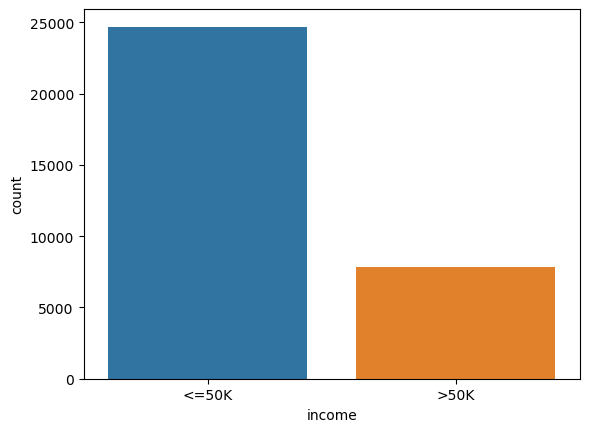

In [297]:
sns.countplot(x='income', data=df)
plt.show()

<b>Observation:</b>
<br>
The target variable is imbalanced with 75% of the data belonging to <=50K class. We will use SMOTE to balance the data

In [298]:
class_counts = df['income'].value_counts()

majority_class = class_counts.idxmax()
# print(majority_class)

df_resampled = pd.concat([
    df[df['income'] == majority_class],
    df[df['income'] != majority_class].sample(n=class_counts[majority_class], replace=True)
])

df['income'].value_counts()

df_resampled['income'].value_counts()

<=50K    24698
>50K     24698
Name: income, dtype: int64

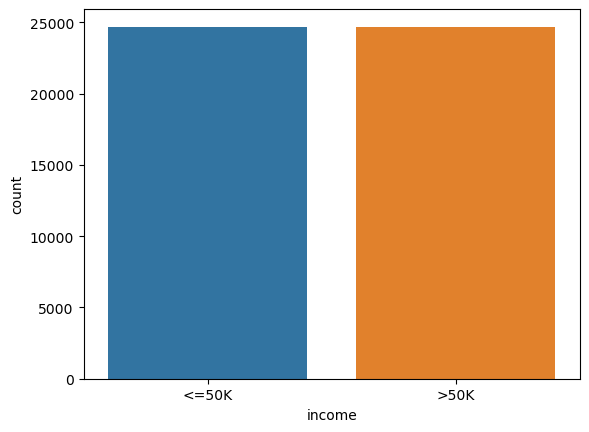

In [384]:
sns.countplot(x='income', data=df_resampled)
plt.show()

### Statistical imputation


In [300]:
df_si_imputer = df_resampled.copy()

X = df_si_imputer.iloc[:, :-1].values
y = df_si_imputer.iloc[:, -1].values

print('Missing: %d' % df_si_imputer.isnull().sum().sum())

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df_si_imputer)
df_stat_trans = imputer.transform(df_si_imputer)

df_stat = pd.DataFrame(df_stat_trans, columns=df.columns,)
df_stat = df_stat.astype(df.dtypes)

print('Missing: %d' % df_stat.isnull().sum().sum())

Missing: 5299
Missing: 0


In [301]:
# split data into numerical and categorical
df_num = df_stat.select_dtypes(include=np.number)
df_cat = df_stat.select_dtypes(exclude=np.number)

display(df_num.head(), df_num.shape)
display(df_cat.head(), df_cat.shape)

,age,final_wght,education_num_years,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


(49396, 6)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


(49396, 9)

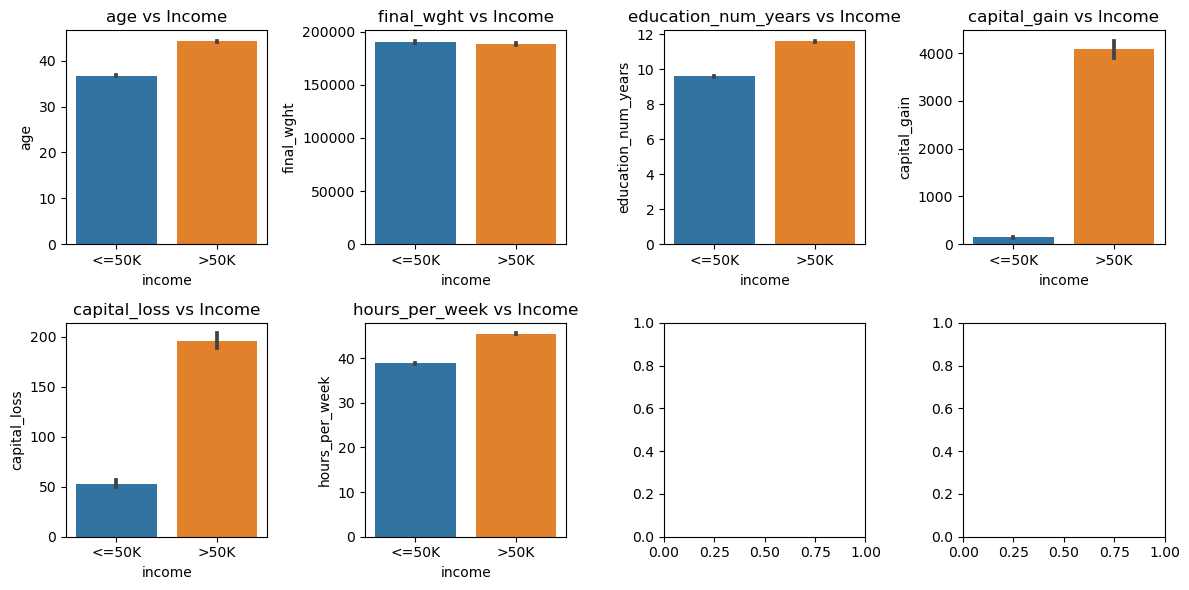

In [302]:
ig, ax = plt.subplots(2, 4, figsize=(12, 6)) 
ax  = ax.flatten()
for i, col in enumerate(df_num.columns):
  sns.barplot(x='income', y=col, data=df_stat, ax=ax[i])
  ax[i].set_title('{} vs Income'.format(col))
plt.tight_layout()
plt.show()

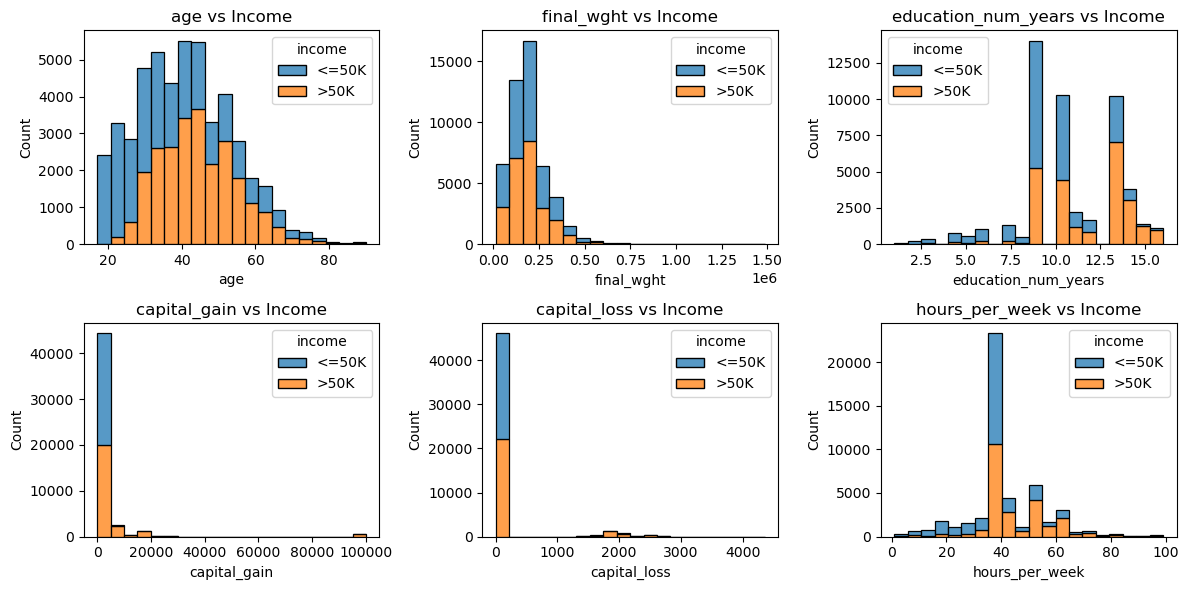

In [303]:
ig, ax = plt.subplots(2, 3, figsize=(12, 6)) 
ax  = ax.flatten()
for i, col in enumerate(df_num.columns):
  sns.histplot(df_stat, x=col, hue='income', multiple='stack', bins=20, ax=ax[i])
  ax[i].set_title('{} vs Income'.format(col))

plt.tight_layout()  
plt.show()

/var/folders/0h/5yv3vz210dx61dfqmldvk_h40000gn/T/ipykernel_45535/4202722728.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
/var/folders/0h/5yv3vz210dx61dfqmldvk_h40000gn/T/ipykernel_45535/4202722728.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
/var/folders/0h/5yv3vz210dx61dfqmldvk_h40000gn/T/ipykernel_45535/4202722728.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
/var/folders/0h/5yv3vz210dx61dfqmldvk_h40000gn/T/ipykernel_45535/4202722728.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)
/var/folders/0h/5yv3vz210dx61dfqmldvk_h40000gn/T/ipykernel_45535/4202722728.py:8: UserWarning: FixedFormatter should only be

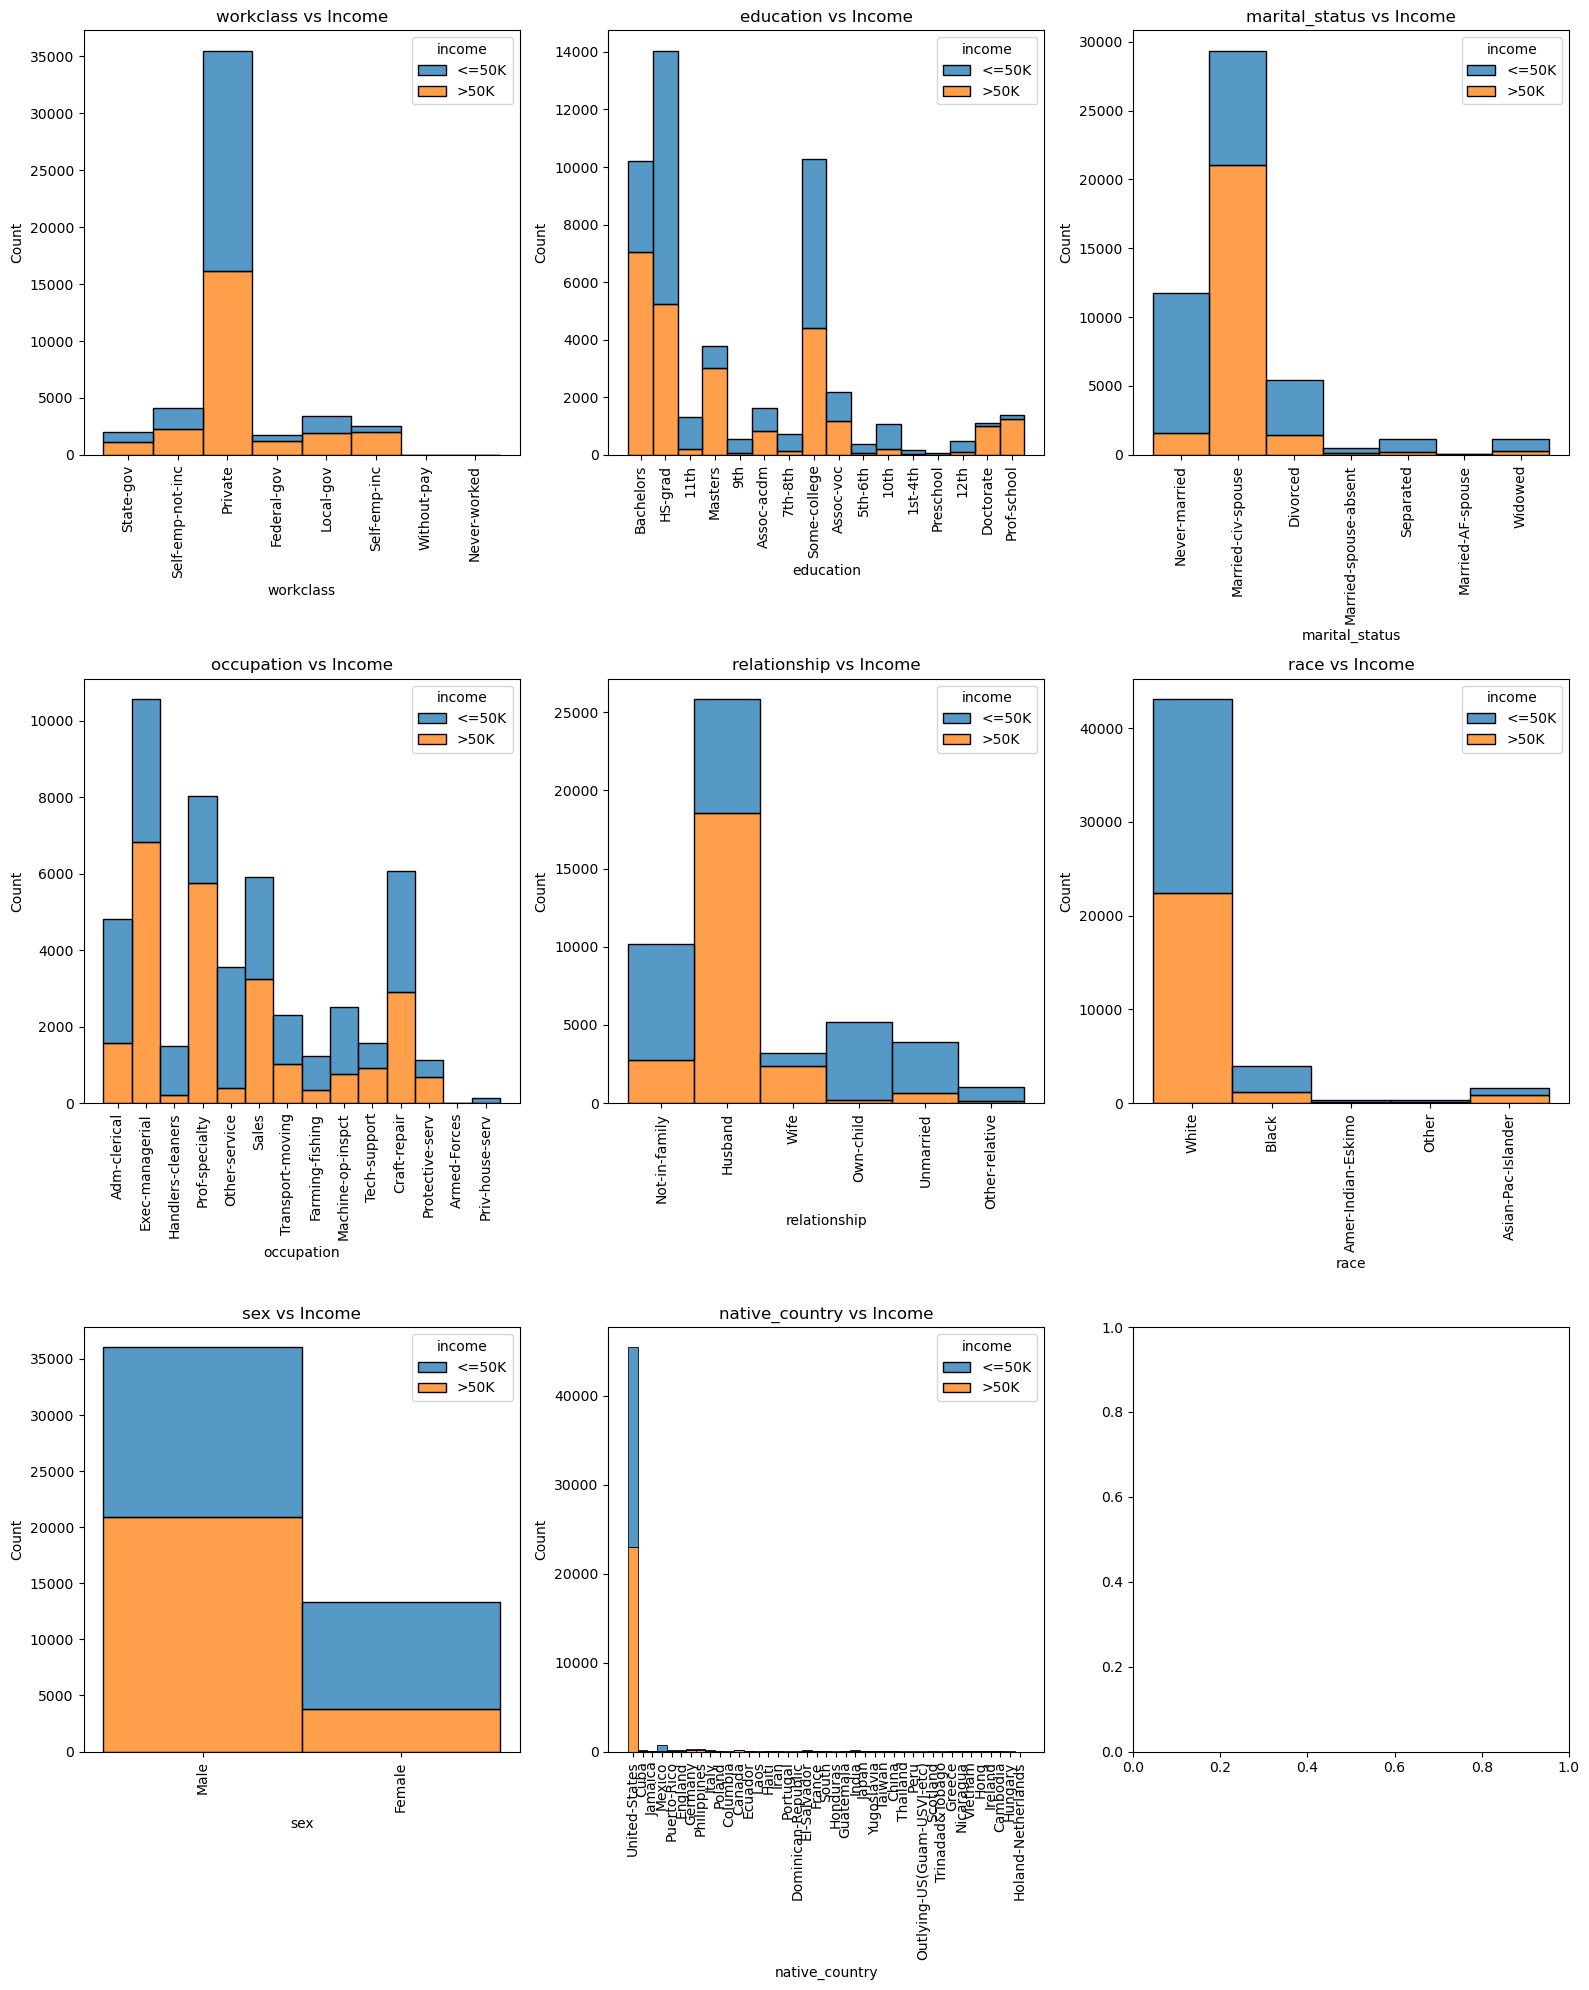

In [304]:
ig, ax = plt.subplots(3, 3, figsize=(16, 20)) 
ax  = ax.flatten()

for i, col in enumerate(df_cat.columns):
  if col != 'income':
    sns.histplot(df_cat, x=col, hue='income', multiple='stack', bins=40, ax=ax[i])
    ax[i].set_title('{} vs Income'.format(col))
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=90)

plt.tight_layout()
plt.show()

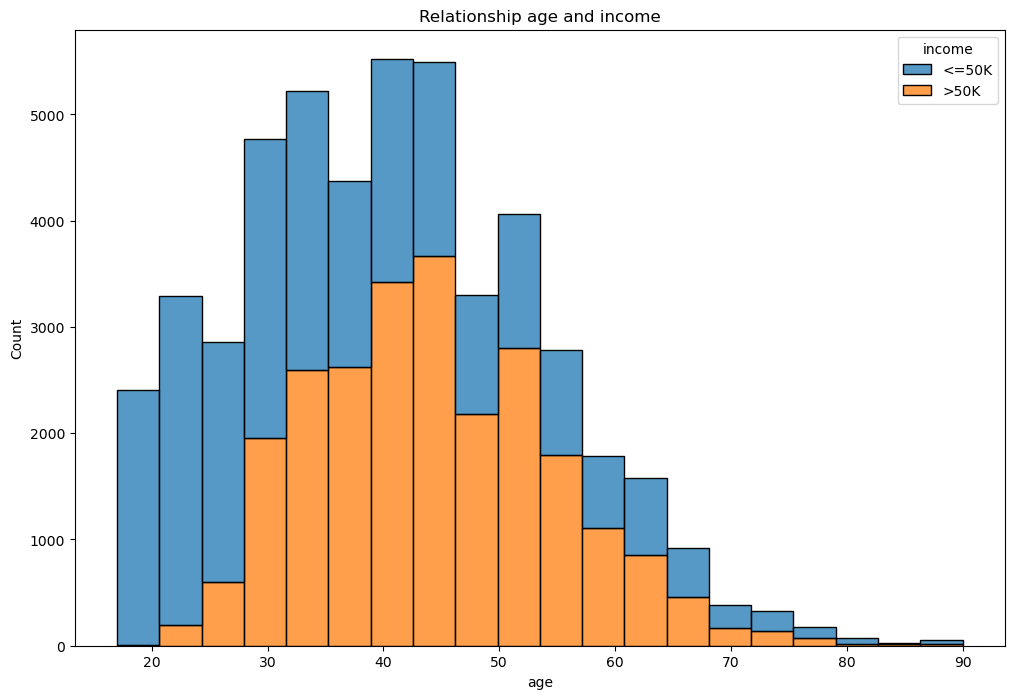

In [305]:
ax, fig = plt.subplots(figsize=(12, 8))
sns.histplot(df_stat, x='age', hue='income', multiple='stack', bins=20)
plt.title('Relationship age and income')
plt.show()

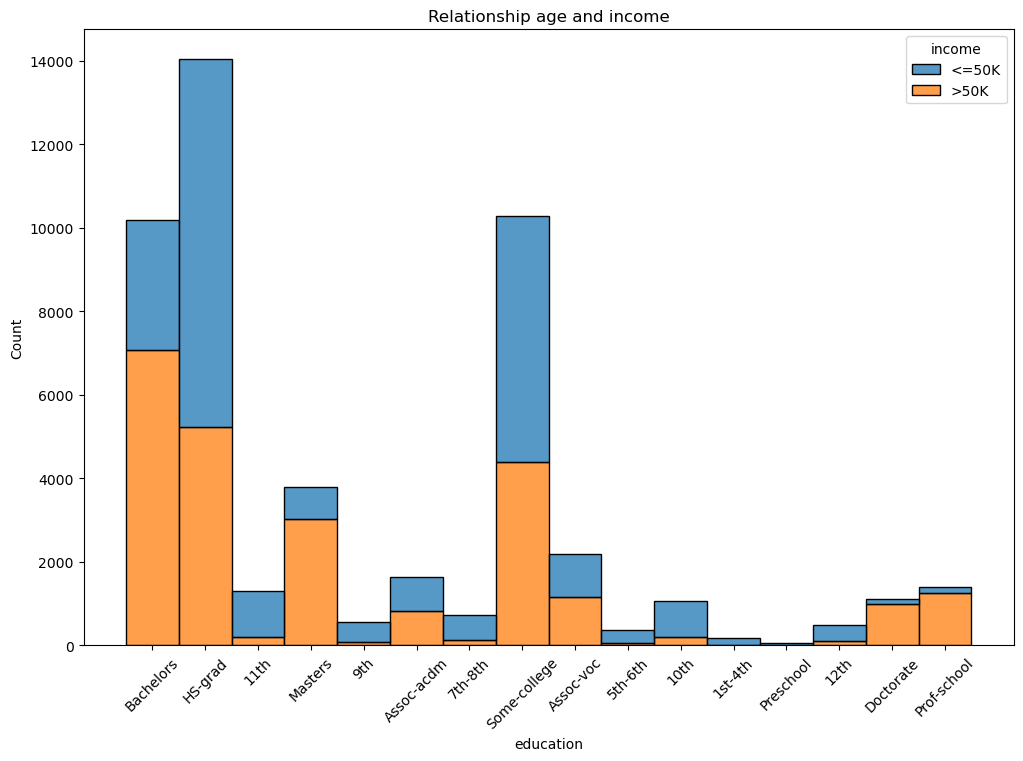

In [306]:
ax, fig = plt.subplots(figsize=(12, 8))
sns.histplot(df_stat, x='education', hue='income', multiple='stack', bins=20)
plt.title('Relationship age and income')
plt.xticks(rotation=45)
plt.show()

<b>Observation</b>
<br>
Income is decreasing as people get older.

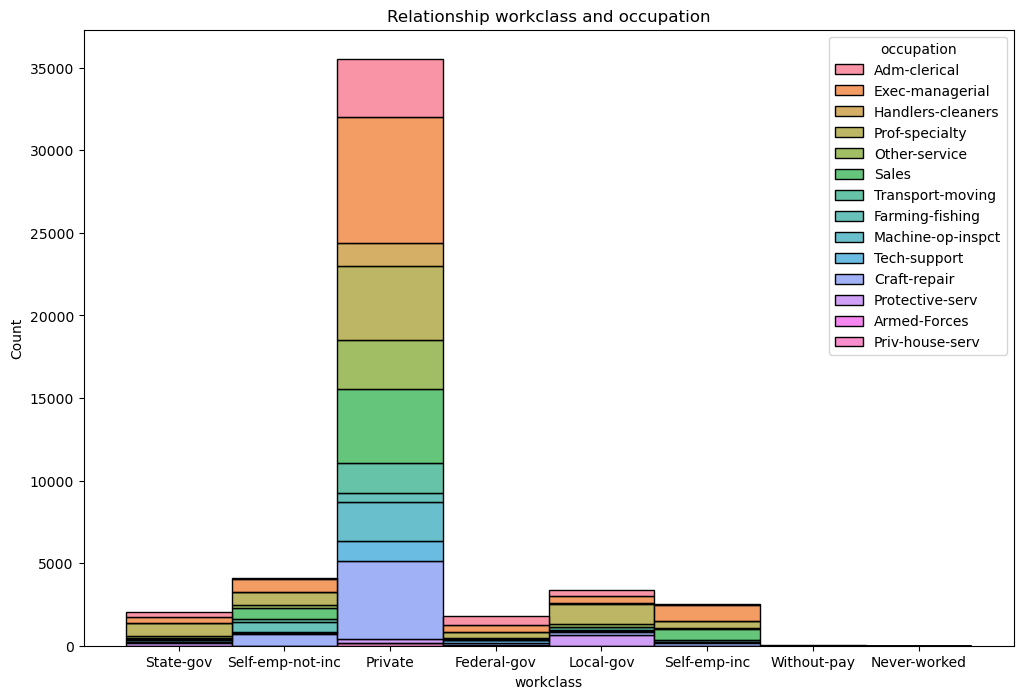

In [307]:
ax, fig = plt.subplots(figsize=(12, 8))
sns.histplot(df_stat, x='workclass', hue='occupation', multiple='stack', bins=20)
plt.title('Relationship workclass and occupation')
plt.show()

## Outlier detection

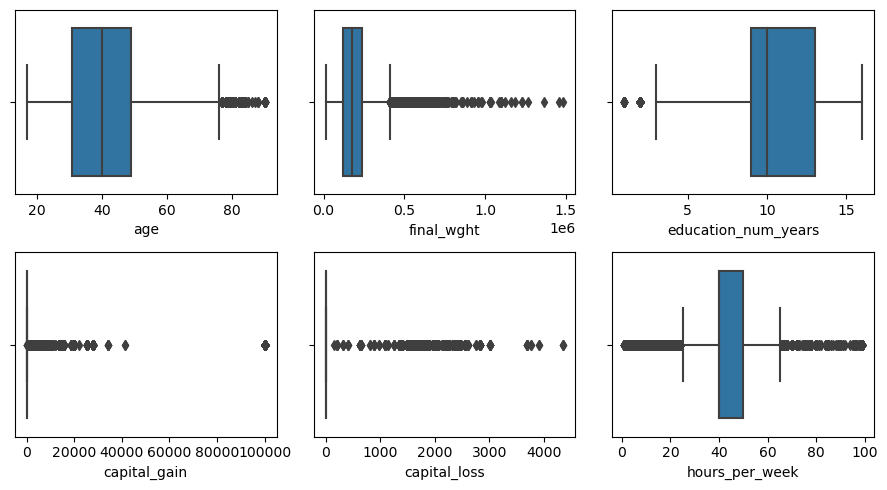

In [308]:
fig, ax = plt.subplots(2, 3, figsize=(9, 5))
ax = ax.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(x=col, data=df_num, ax=ax[i])
plt.tight_layout()
plt.show()

### Removing outliers using standard deviation

In [309]:
def std_outlier_removal(data, column, threshold):
  data_mean = data[column].mean()
  data_std =  data[column].std()
  cut_off = data_std * threshold

  lower = data_mean - cut_off
  upper = data_mean + cut_off

  outliers = [x for x in data[column] if x < lower or x > upper]
  print('{}'.format(column))
  print('Identified outliers: %d' % len(outliers))
  outliers_removed = [x for x in data[column] if x >= lower and x <= upper]
  print('Non-outlier observations: %d' % len(outliers_removed))

  print('\n')
  df_outliers_removed = data.loc[~data[column].isin(outliers)]
  return df_outliers_removed


In [310]:
df_iqr = df_num.copy()
df_outliers_rem = std_outlier_removal(df_iqr, 'age', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'final_wght', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'education_num_years', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'capital_gain', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'capital_loss', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'hours_per_week', 3)

age
Identified outliers: 156
Non-outlier observations: 49240


final_wght
Identified outliers: 552
Non-outlier observations: 48688


education_num_years
Identified outliers: 214
Non-outlier observations: 48474


capital_gain
Identified outliers: 510
Non-outlier observations: 47964


capital_loss
Identified outliers: 2833
Non-outlier observations: 45131


hours_per_week
Identified outliers: 753
Non-outlier observations: 44378




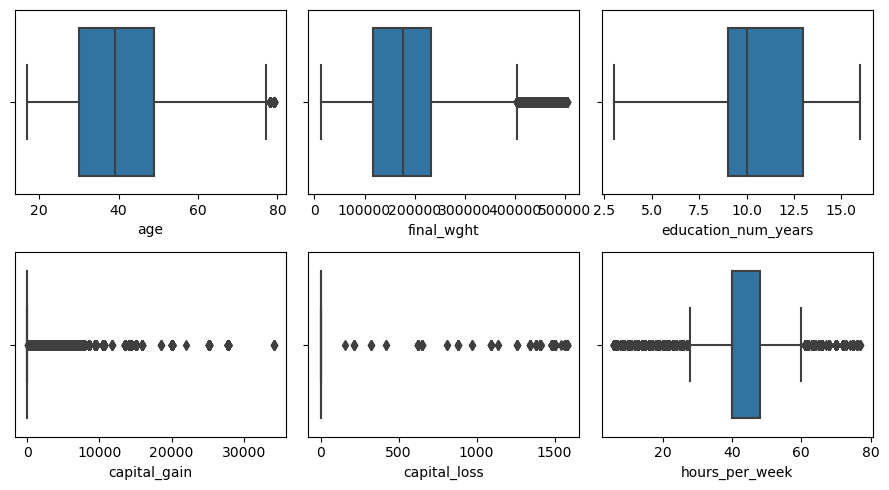

In [320]:
fig, ax = plt.subplots(2, 3, figsize=(9, 5))
ax = ax.flatten()

for i, col in enumerate(df_num.columns):
    sns.boxplot(x=col, data=df_outliers_rem, ax=ax[i])
plt.tight_layout()
plt.show()

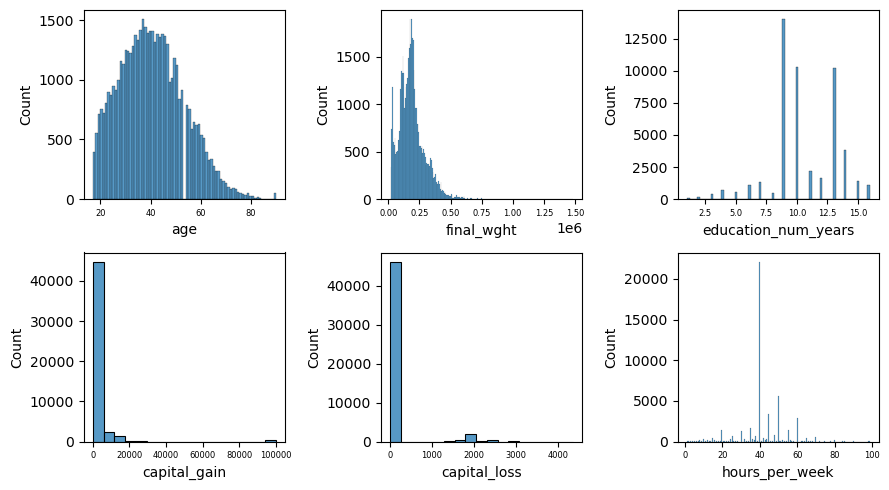

In [316]:
fig, ax = plt.subplots(2, 3, figsize=(9, 5))
ax = ax.flatten()

for i, col in enumerate(df_num.columns):
    sns.histplot(df_num[col], ax=ax[i])
    ax[i].tick_params(axis='x', labelsize=6)
    plt.tight_layout()
plt.show()

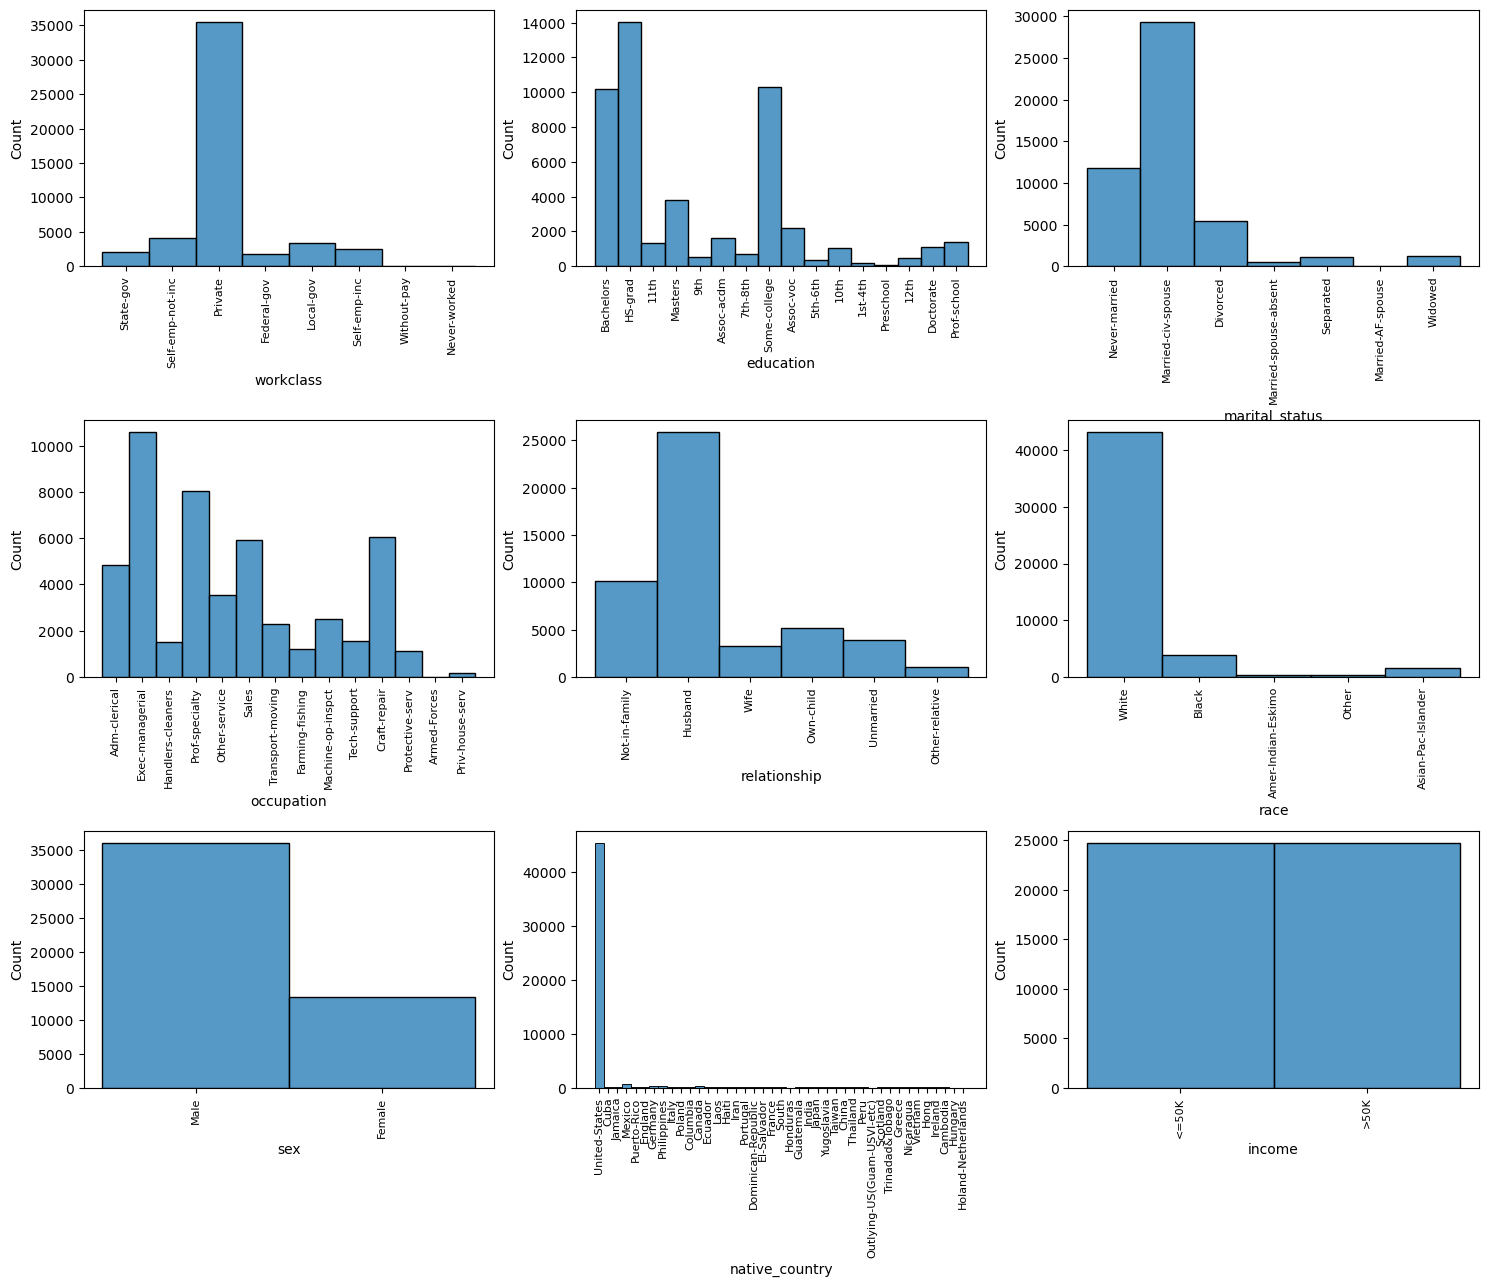

In [317]:
fig, ax = plt.subplots(3, 3, figsize=(18, 14))
ax = ax.flatten()

for i, col in enumerate(df_cat.columns):
    sns.histplot(df_cat[col], ax=ax[i])
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].tick_params(axis='x', labelsize=8)
    plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show()

## Data Transformation

#### Data prep for transforms

In [322]:
## merge the numerical and categorical dataframes, after outlier removal
# remove the same rows from the categorical dataframe
def merge_num_cat(df_cat, df_outliers_rem):
  df_cat_std = df_cat.loc[df_outliers_rem.index]
  df_std = pd.concat([df_outliers_rem, df_cat_std], axis=1)
  df_std = df_std.reset_index(drop=True)

  return df_std


df_std = merge_num_cat(df_cat, df_outliers_rem)


def data_sep(df_std):
  df_drop_income_edu = df_std.drop(['income', 'education'], axis=1)

  df_cat = df_drop_income_edu.select_dtypes(include=['object']).columns
  df_edu = df_std['education']
  df_num = df_std.select_dtypes(include=['int64']).columns

  df_edu = df_edu.to_frame().columns

  return df_cat, df_edu, df_num

(44378, 15)


## Feature Scaling 

In [342]:
X = df_std.drop('income', axis=1)
y = df_std['income']

le = LabelEncoder()
y = le.fit_transform(y)

### Base Model without any feature  selection

In [343]:
df_cat, df_edu, df_num = data_sep(df_std)

def create_transformer(df_cat, df_edu, df_num):
    t = [('cat', OneHotEncoder(drop='first', sparse_output=False), df_cat),
    ('edu', OrdinalEncoder(), df_edu), 
    ('num', MinMaxScaler(), df_num)]
    
    col_trans = ColumnTransformer(transformers=t)

    return col_trans

In [344]:
col_trans = create_transformer(df_cat, df_edu, df_num)  
power_trans = PowerTransformer(method='yeo-johnson')
rfc_model = RandomForestClassifier()

pipeline = Pipeline(steps=[('prep', col_trans), ('pt', power_trans), ('algo', rfc_model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

scores = np.absolute(scores)

print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.936 (0.004)


## Feature Selection

### Base model with SelectKBest k =25

In [345]:
col_trans = create_transformer(df_cat, df_edu, df_num)  
power_trans = PowerTransformer(method='yeo-johnson')
skb_f_sel = SelectKBest(score_func=f_classif, k=25)
rfc_model = RandomForestClassifier()

pipeline = Pipeline(steps=[('prep', col_trans), ('pt', power_trans), ('fs', skb_f_sel), ('algo', rfc_model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('>%.3f (%.3f)' % (np.mean(scores), np.std(scores)))

/Users/diegosabajo/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>0.909 (0.003)


### Selecting optimal k features using SelectKBest

In [346]:
X_trans = col_trans.fit_transform(X)
pt = PowerTransformer(method='yeo-johnson')

X_trans = pt.fit_transform(X_trans)

feature_names = col_trans.get_feature_names_out()
df_scaled = pd.DataFrame(X_trans, columns=feature_names)
display(df_scaled.head(), df_scaled.shape)

,cat__workclass_Local-gov,cat__workclass_Never-worked,cat__workclass_Private,cat__workclass_Self-emp-inc,cat__workclass_Self-emp-not-inc,cat__workclass_State-gov,cat__workclass_Without-pay,cat__marital_status_Married-AF-spouse,cat__marital_status_Married-civ-spouse,cat__marital_status_Married-spouse-absent,...,cat__native_country_United-States,cat__native_country_Vietnam,cat__native_country_Yugoslavia,edu__education,num__age,num__final_wght,num__education_num_years,num__capital_gain,num__capital_loss,num__hours_per_week
0,-0.271805,-0.011628,-1.626993,-0.222926,-0.291883,4.761120,-0.017764,-0.028095,-1.173877,-0.100643,...,0.290061,-0.039462,-0.024673,-0.594538,-0.009157,-1.243315,0.976352,2.275305,-0.08509,-0.186718
1,-0.271805,-0.011628,-1.626993,-0.222926,3.426027,-0.210035,-0.017764,-0.028095,0.851878,-0.100643,...,0.290061,-0.039462,-0.024673,-0.594538,0.812495,-1.158024,0.976352,-0.381526,-0.08509,-2.488275
2,-0.271805,-0.011628,0.614631,-0.222926,-0.291883,-0.210035,-0.017764,-0.028095,-1.173877,-0.100643,...,0.290061,-0.039462,-0.024673,0.121133,-0.089336,0.446341,-0.645774,-0.381526,-0.08509,-0.186718
3,-0.271805,-0.011628,0.614631,-0.222926,-0.291883,-0.210035,-0.017764,-0.028095,0.851878,-0.100643,...,0.290061,-0.039462,-0.024673,-2.158802,1.019445,0.634385,-1.396748,-0.381526,-0.08509,-0.186718
4,-0.271805,-0.011628,0.614631,-0.222926,-0.291883,-0.210035,-0.017764,-0.028095,0.851878,-0.100643,...,-3.447550,-0.039462,-0.024673,-0.594538,-0.951235,1.521181,0.976352,-0.381526,-0.08509,-0.186718


(44378, 82)

In [349]:
def get_models():
   models = dict()
  
   for i in range(1, 60):
      skb_f_sel = SelectKBest(score_func=f_classif, k=i)
      rfc_model = RandomForestClassifier()
      steps = [('fs', skb_f_sel), ('algo', rfc_model)]
      models[str(i)] = Pipeline(steps=steps)

   return models

def evaluate_model(model, X, y):
   cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
   scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
   
   return scores

models = get_models()

results, names = list(), list()

for name, model in models.items():
   scores = evaluate_model(model, X_trans, y)
   results.append(scores)
   names.append(name)
   print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>1 0.755 (0.006)
>2 0.755 (0.006)
>3 0.779 (0.006)
>4 0.797 (0.006)
>5 0.798 (0.005)
>6 0.843 (0.005)
>7 0.862 (0.006)
>8 0.868 (0.006)
>9 0.871 (0.005)
>10 0.876 (0.005)
>11 0.876 (0.005)
>12 0.880 (0.005)


/Users/diegosabajo/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>13 0.885 (0.004)


/Users/diegosabajo/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>14 0.894 (0.004)
>15 0.895 (0.004)
>16 0.896 (0.004)
>17 0.898 (0.003)
>18 0.901 (0.004)
>19 0.901 (0.004)
>20 0.903 (0.004)
>21 0.903 (0.004)
>22 0.907 (0.004)
>23 0.907 (0.004)
>24 0.907 (0.003)
>25 0.909 (0.004)
>26 0.908 (0.004)
>27 0.908 (0.004)
>28 0.907 (0.004)
>29 0.908 (0.004)
>30 0.909 (0.004)
>31 0.911 (0.004)
>32 0.912 (0.004)
>33 0.913 (0.004)
>34 0.914 (0.005)
>35 0.915 (0.005)
>36 0.916 (0.004)
>37 0.916 (0.004)
>38 0.916 (0.004)
>39 0.917 (0.004)
>40 0.917 (0.004)
>41 0.917 (0.004)
>42 0.917 (0.004)
>43 0.917 (0.004)
>44 0.917 (0.004)
>45 0.917 (0.004)
>46 0.917 (0.004)


/Users/diegosabajo/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>47 0.917 (0.004)
>48 0.917 (0.004)


/Users/diegosabajo/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>49 0.917 (0.004)


/Users/diegosabajo/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>50 0.917 (0.004)


/Users/diegosabajo/miniconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


>51 0.917 (0.004)
>52 0.917 (0.004)
>53 0.917 (0.004)
>54 0.917 (0.004)
>55 0.917 (0.004)
>56 0.918 (0.004)
>57 0.917 (0.004)
>58 0.918 (0.004)
>59 0.918 (0.004)


In [352]:
col_trans = create_transformer(df_cat, df_edu, df_num)  
power_trans = PowerTransformer(method='yeo-johnson')
skb_f_sel = SelectKBest(score_func=f_classif, k=32)
rfc_model = RandomForestClassifier()

pipeline = Pipeline(steps=[('prep', col_trans), ('pt', power_trans), ('fs', skb_f_sel), ('algo', rfc_model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

print('>%.3f (%.3f)' % (np.mean(scores), np.std(scores)))

>0.912 (0.004)


### Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

# Define the pipeline with feature selection and classifier
pipeline = Pipeline(steps=[
    ('fs', SelectKBest(score_func=f_classif, k=32)),
    ('classifier', RandomForestClassifier(random_state=123))
])

# Define the parameter grid for grid search
param_grid = {
    'classifier__n_estimators': [100, 200, 300, 400, 500],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__max_depth': [6, 7, 8, 9, 10],
    'classifier__criterion': ['gini', 'entropy']
}

# Perform grid search
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, n_jobs=-1, verbose=2)
grid_search.fit(X_trans, y)

# Get the best parameters
best_params = grid_search.best_params_
print('Best Parameters:', best_params)


## Final Model

In [382]:
col_trans = create_transformer(df_cat, df_edu, df_num)  
power_trans = PowerTransformer(method='yeo-johnson')
skb_f_sel = SelectKBest(score_func=f_classif, k=32)
rfc_model = RandomForestClassifier()

pipeline = Pipeline(steps=[('prep', col_trans), ('pt', power_trans), ('fs', skb_f_sel), ('algo', rfc_model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('>%.3f (%.3f)' % (np.mean(scores), np.std(scores)))

>0.912 (0.004)


In [383]:
col_trans = create_transformer(df_cat, df_edu, df_num)  
power_trans = PowerTransformer(method='yeo-johnson')
skb_f_sel = SelectKBest(score_func=f_classif, k=32)
rfc_model = RandomForestClassifier()

pipeline = Pipeline(steps=[('prep', col_trans), ('pt', power_trans), ('fs', skb_f_sel), ('algo', rfc_model)])
pipeline.fit(X, y)
y_pred = pipeline.predict(X)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97     23161
           1       0.95      0.98      0.96     21217

    accuracy                           0.97     44378
   macro avg       0.97      0.97      0.97     44378
weighted avg       0.97      0.97      0.97     44378

